In [72]:
import pandas as pd
metadata_filepath = "metadata_of_normalized_and_feature_selected.csv"
data_filepath = "normalized_and_feature_selected.csv"
metadata_df = pd.read_csv(metadata_filepath, index_col=0)
data_df = pd.read_csv(data_filepath,  index_col=0)

In [73]:
print(data_df.shape)
data_df.head()

(35436, 3000)


,HES4,ISG15,TTLL10,CFAP74,MORN1,HES5,TP73,ERRFI1,PIK3CD-AS2,FBXO2,...,CH507-9B2.5,CH507-42P11.8,CH507-254M2.3,AP001347.6,ATP5J,C21orf59,ATP5O,AP000692.10,DSCR3,C21orf33
AAACCCAAGGCGACAT_1,-0.245342,-0.654464,-0.321928,-0.227773,-0.323629,-0.117457,1.059052,0.646571,1.693757,1.792633,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466
AAACCCAGTACTCGAT_1,0.663890,-0.654464,-0.321928,-0.227773,-0.323629,-0.117457,1.648158,1.317635,-0.424334,1.509495,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466
AAACCCAGTATGTGTC_1,-1.124862,-0.654464,-0.321928,-0.227773,-0.323629,-0.117457,-0.549411,0.751522,-0.424334,-0.836930,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466
AAACCCAGTTAGCGGA_1,1.484936,0.113054,-0.321928,-0.227773,-0.323629,-0.117457,-0.549411,-0.227141,-0.424334,-0.209533,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466
AAACCCAGTTGCCGAC_1,1.202926,-0.191326,-0.321928,-0.227773,-0.323629,1.949898,-0.549411,0.318160,-0.424334,-0.836930,...,-0.113451,-0.145029,-0.094676,-0.097025,-0.725331,-0.428374,-0.739072,-0.115149,-0.28135,-0.218466


In [74]:
print(metadata_df.shape)
metadata_df.head()

(35436, 5)


,donor,smoke,smoke_noT89,clusters_10,clusters_16a
AAACCCAAGGCGACAT_1,T101,heavy,heavy,c2,c2
AAACCCAGTACTCGAT_1,T101,heavy,heavy,c3,c3a
AAACCCAGTATGTGTC_1,T101,heavy,heavy,c4,c4
AAACCCAGTTAGCGGA_1,T101,heavy,heavy,c4,c4
AAACCCAGTTGCCGAC_1,T101,heavy,heavy,c1,c1


In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

y = metadata_df['smoke']
responses = ['heavy', 'light', 'never']
encoded_responses = [1 if response != 'never' else 0 for response in y]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_df, encoded_responses, test_size=0.2, random_state=42)

In [76]:
# Training the logistic regression model
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [77]:
# Predicting probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Predicting based on a default threshold of 0.5
y_pred = (y_probs > 0.5).astype(int)

In [78]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9583803611738149
Precision: 0.9609521262369618
Recall: 0.9601817210048103


In [79]:
# Finding the optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.6132078882544009


In [96]:

y_pred_opt = (y_probs > optimal_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_opt)
precision = precision_score(y_test, y_pred_opt)
recall = recall_score(y_test, y_pred_opt)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.958803611738149
Precision: 0.9652103559870551
Recall: 0.9564404061998931


In [81]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")

AUC: 0.9915204638195275


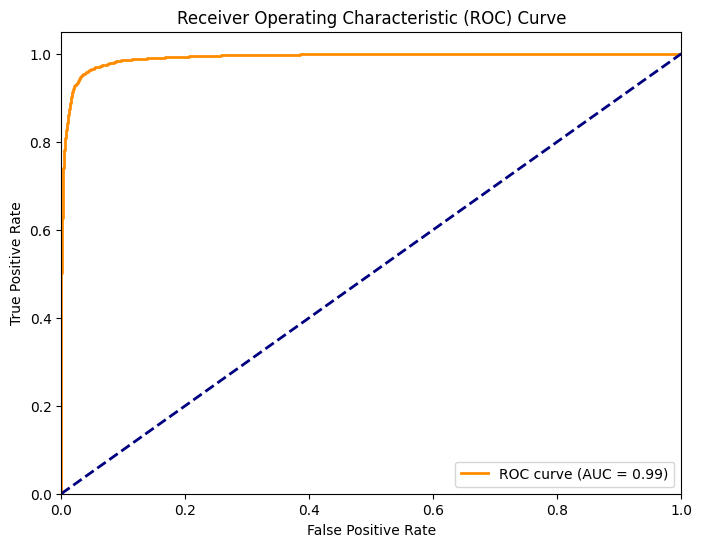

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

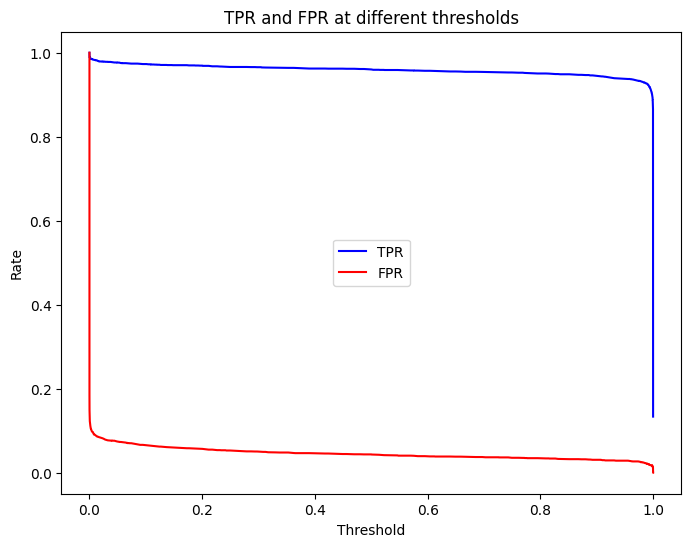

In [83]:
# Plotting thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR', color='blue')
plt.plot(thresholds, fpr, label='FPR', color='red')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR at different thresholds')
plt.legend()
plt.show()

### Confusion Matrix

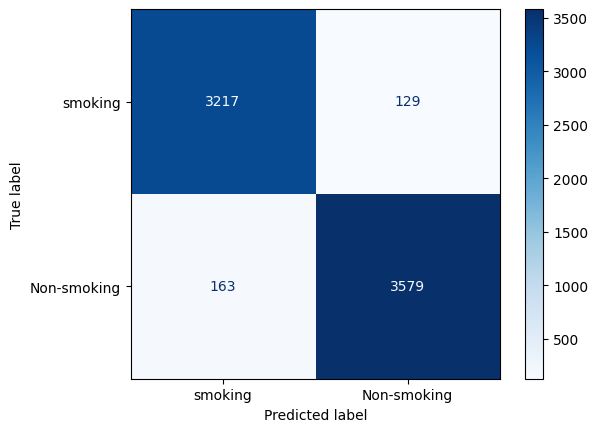

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_opt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['smoking','Non-smoking'])
disp.plot(cmap = 'Blues')
plt.show()

[Text(0, 0.5, 'smoking'), Text(0, 1.5, 'Non-smoking')]

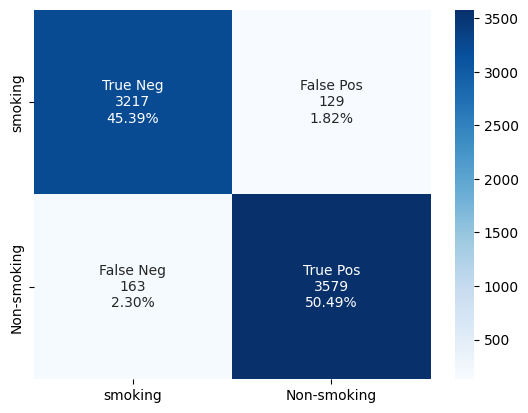

In [140]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
g.set_xticks([0.5,1.5])
g.set_xticklabels(['smoking','Non-smoking'])
g.set_yticks([0.5,1.5])
g.set_yticklabels(['smoking','Non-smoking'])

In [84]:
metadata_df_copy = metadata_df.copy()
metadata_df_copy['umi'] = metadata_df.index
t = pd.DataFrame({'umi': X_test.index, 'smoke': y_test, 'pred': y_pred})
test_meta = pd.merge(t, metadata_df_copy, left_on = 'umi', right_on = 'umi', how = 'left')
test_meta.head()

,umi,smoke_x,pred,donor,smoke_y,smoke_noT89,clusters_10,clusters_16a
0,CGCATAAAGCCTCTCT_1,1,1,T101,heavy,heavy,c4,c4
1,CAAGGCCAGTGGAGAA_5,0,0,T137,never,never,c1,c1
2,TCCTTTCTCTTACTGT_11,1,1,T167,heavy,heavy,c2,c2
3,CGTCCATTCAAGGTAA_5,0,0,T137,never,never,c2,c2
4,TCTATTGCACTCGACG_12,1,1,T84,light,light,c2,c2


In [85]:
from collections import Counter
veri_dict = {}
for don in test_meta['donor'].unique():
    print(don)
    veri_dict[don] = {}
    test_meta_don = test_meta[test_meta['donor'] == don]
    veri_dict[don]['smokingStatus'] = list(test_meta_don['smoke_y'])[0]
    correct = []
    incorrect = []
    veri_dict[don]['class'] = ""
    for i in range(len(test_meta_don['smoke_x'])):
        if list(test_meta_don['pred'])[i] == list(test_meta_don['smoke_x'])[i]:
            correct.append(list(test_meta_don['umi'])[i])
        else:
            incorrect.append(list(test_meta_don['umi'])[i])
    if list(test_meta_don['smoke_x'])[0] == 1:
        veri_dict[don]['class'] = 'smoking'
    else: 
        veri_dict[don]['class'] += 'non-smoking'
            
    veri_dict[don]['correct_lst'] = correct
    veri_dict[don]['incorrect_lst'] = incorrect
    veri_dict[don]['correct'] = len(correct)
    veri_dict[don]['incorrect'] = len(incorrect)
print(veri_dict)


T101
T137
T167
T84
T164
T126
T153
T89
T85
T166
T120
T121
T90
T165
T154
{'T101': {'smokingStatus': 'heavy', 'class': 'smoking', 'correct_lst': ['CGCATAAAGCCTCTCT_1', 'TTCTGTATCCATTTAC_1', 'TGGAGAGTCAGTGTCA_1', 'GAGTCATCAACAGCCC_1', 'GTCACGGGTAACCAGG_1', 'CTACTATAGGAACTCG_1', 'GATGGAGGTCTTTATC_1', 'CGGAACCAGCTAATGA_1', 'TGTTACTGTCCTTGTC_1', 'ATCACGATCCGGACTG_1', 'CGCATAACATATCTCT_1', 'ACGATGTGTCAACCAT_1', 'TTGCCTGAGCAACAGC_1', 'CAACAGTAGATGACCG_1', 'ACACCAATCAAAGACA_1', 'TGCTTCGCACTTCATT_1', 'GCGGATCTCTTTCAGT_1', 'TTTAGTCTCGTGCACG_1', 'CGCCAGATCGTAACAC_1', 'AAATGGAGTTGTAAAG_1', 'CTCATTAAGGGAGGTG_1', 'ATACTTCAGCGTATGG_1', 'GCTACAATCCGTGGTG_1', 'GACTATGCACAGTCCG_1', 'GTAACCACATGGCACC_1', 'AACCATGAGGTAAGTT_1', 'AACACACGTGCCCTTT_1', 'ACGGAAGCATTCTCCG_1', 'AACGTCAAGCACGGAT_1', 'GTGGAAGGTTGCATCA_1', 'GGTAACTAGTATGACA_1', 'CAGATTGCATGACTTG_1', 'GGCTTTCAGCATCCTA_1', 'CAGTTCCCATACACCA_1', 'GATGGAGCACCAGGTC_1', 'ATGATCGTCAAACGTC_1', 'AGCCAATGTTCAATCG_1', 'GACCCAGTCGCGTCGA_1', 'CTCAAGAGTACCTGTA_1',

In [86]:
veri_dict_df = pd.DataFrame(veri_dict).T
veri_dict_df.head()

,smokingStatus,class,correct_lst,incorrect_lst,correct,incorrect
T101,heavy,smoking,"[CGCATAAAGCCTCTCT_1, TTCTGTATCCATTTAC_1, TGGAG...","[TGGGAGAAGCAGGTCA_1, TGTCCACGTGAGTAGC_1, TGACA...",638,23
T137,never,non-smoking,"[CAAGGCCAGTGGAGAA_5, CGTCCATTCAAGGTAA_5, CGGCT...","[CAGCAGCAGTTGCAGG_5, AACCATGCAGCCACCA_5, CTCGA...",244,29
T167,heavy,smoking,"[TCCTTTCTCTTACTGT_11, AGCGCCATCCGCAGTG_11, ACA...","[TCCACGTGTAACATCC_11, GCGTGCATCCCAATAG_11, ACA...",528,18
T84,light,smoking,"[TCTATTGCACTCGACG_12, TCATTTGCATCACCCT_12, CAG...","[CTGCCTACATACGCCG_12, TTCTTAGAGTCCCACG_12, GAT...",325,25
T164,never,non-smoking,"[CATCAAGAGAATCTAG_8, AGGAAATAGATAGGGA_8, GGTTA...","[GCCGATGAGTGAGTGC_8, TCTTGCGCATGGAACG_8, GCTCA...",606,19


In [87]:
smokers = veri_dict_df[veri_dict_df['class'] == 'smoking']
non_smokers = veri_dict_df[veri_dict_df['class'] == 'non-smoking']

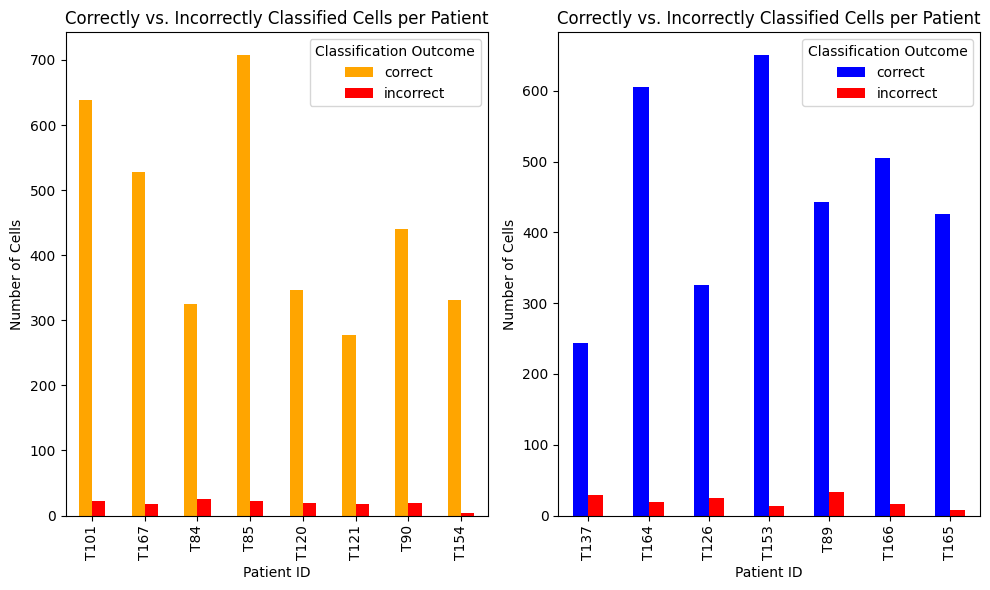

<Figure size 640x480 with 0 Axes>

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot for correct vs. incorrect classifications
smokers[['correct', 'incorrect']].plot(kind='bar', ax=ax[0], color=['orange', 'red'])
ax[0].set_title('Correctly vs. Incorrectly Classified Cells per Patient')
ax[0].set_xlabel('Patient ID')
ax[0].set_ylabel('Number of Cells')
ax[0].legend(title='Classification Outcome')

non_smokers[['correct', 'incorrect']].plot(kind='bar', ax=ax[1], color=['blue', 'red'])
ax[1].set_title('Correctly vs. Incorrectly Classified Cells per Patient')
ax[1].set_xlabel('Patient ID')
ax[1].set_ylabel('Number of Cells')
ax[1].legend(title='Classification Outcome')
plt.tight_layout()
plt.show()


plt.savefig('logistic_metrics.png')

In [89]:
coefficients = model.coef_[0]
feature_names = X_test.columns

top_n = 10

top_features_indices = np.argsort(np.abs(coefficients))[-top_n:]
top_features_names = feature_names[top_features_indices]
top_coefficients = coefficients[top_features_indices]
print(top_features_names)
print(top_coefficients)

Index(['LGALS7B', 'PLCG2', 'LY6D', 'S100P', 'LSP1', 'IGHA1', 'MMP10', 'MSMB',
       'MUC20-OT1', 'CYP1B1'],
      dtype='object')
[-1.3802609   1.44302044 -1.54785786  1.56598593  1.61671246 -1.64350078
 -1.69087014  1.72612395 -1.775791    1.83245092]


<Figure size 100x600 with 0 Axes>

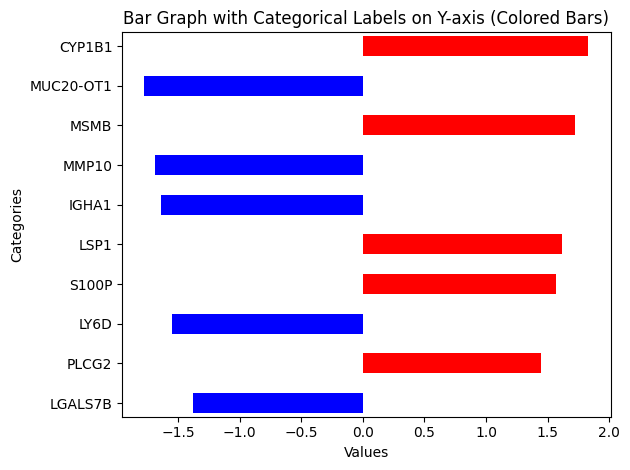

In [151]:
plt.figure(figsize=(1, 6))
colors = ['red' if val > 0 else 'blue' for val in top_coefficients]

# Adjust bar width and padding
bar_width = 0.5  # Adjust as needed
bar_padding = 0.1  # Adjust as needed

fig, ax = plt.subplots()
bars = ax.barh(top_features_names, top_coefficients, height=bar_width, color=colors)

# Add labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Categories')
ax.set_title('Bar Graph with Categorical Labels on Y-axis (Colored Bars)')

# Adjust spacing between bars
ax.margins(y=0.01)

plt.tight_layout()
plt.show()

In [91]:
full = pd.merge(X_train, metadata_df, left_index=True, right_index=True, how = 'inner')

In [92]:
correct_indices = y_test == y_pred
incorrect_indices = y_test != y_pred
smoking_cells = full[full['smoke'] != 'never']
non_smoking_cells = full.drop(smoking_cells.index, axis = 0)

In [93]:
# Calculate and display the average values for these top features, and their coefficients
print("Top Features Analysis:")
for i, feature_name in enumerate(top_features_names):
    correct_avg = X_test.loc[correct_indices, feature_name].mean()
    incorrect_avg = X_test.loc[incorrect_indices, feature_name].mean()
    coeff = top_coefficients[i]
    smoking_cell_avg = smoking_cells[feature_name].mean()
    non_smoking_cell_avg = non_smoking_cells[feature_name].mean()
    
    print(f"{feature_name}: Correct Avg = {correct_avg:.4f}, Incorrect Avg = {incorrect_avg:.4f}, Coefficient = {coeff:.4f}, Smoking Cell Mean Expression = {smoking_cell_avg}, Non-Smoking Cell Mean Expression = {non_smoking_cell_avg:}")

Top Features Analysis:
LGALS7B: Correct Avg = 0.0032, Incorrect Avg = -0.1602, Coefficient = -1.3803, Smoking Cell Mean Expression = -0.1392115086890549, Non-Smoking Cell Mean Expression = 0.15678953992948308
PLCG2: Correct Avg = 0.0135, Incorrect Avg = -0.2013, Coefficient = 1.4430, Smoking Cell Mean Expression = -0.03531057720425826, Non-Smoking Cell Mean Expression = 0.03688106342406749
LY6D: Correct Avg = 0.0294, Incorrect Avg = -0.1834, Coefficient = -1.5479, Smoking Cell Mean Expression = -0.03574176015223443, Non-Smoking Cell Mean Expression = 0.02889266243384037
S100P: Correct Avg = 0.0153, Incorrect Avg = -0.2070, Coefficient = 1.5660, Smoking Cell Mean Expression = 0.1358653994928272, Non-Smoking Cell Mean Expression = -0.1543709152692911
LSP1: Correct Avg = -0.0055, Incorrect Avg = -0.0650, Coefficient = 1.6167, Smoking Cell Mean Expression = 0.19838694745273275, Non-Smoking Cell Mean Expression = -0.2164746798196662
IGHA1: Correct Avg = 0.0182, Incorrect Avg = -0.1047, Coef

In [122]:
TP_indices = []
FP_indices = []
TN_indices = []
FN_indices = []
for i in range(len(y_pred_opt)):
    if (y_pred_opt[i] == 1) & (y_test[i] == 1):
        TP_indices.append(X_test.index[i])
    elif (y_pred_opt[i] == 1) & (y_test[i] == 0):
        FP_indices.append(X_test.index[i])
    elif (y_pred_opt[i] == 0) & (y_test[i] == 0):
        TN_indices.append(X_test.index[i])
    else:
        FN_indices.append(X_test.index[i])
print(len(TP_indices), len(FP_indices), len(TN_indices), len(FN_indices))

3579 129 3217 163


In [123]:
print(X_test.head())

                         HES4     ISG15    TTLL10    CFAP74     MORN1  \
CGCATAAAGCCTCTCT_1   0.431277 -0.654464 -0.321928 -0.227773  1.138621   
CAAGGCCAGTGGAGAA_5   1.142743  0.620719 -0.321928 -0.227773 -0.323629   
TCCTTTCTCTTACTGT_11 -1.124862 -0.654464 -0.321928 -0.227773  1.366243   
CGTCCATTCAAGGTAA_5  -1.124862 -0.654464 -0.321928 -0.227773 -0.323629   
TCTATTGCACTCGACG_12 -1.124862 -0.654464 -0.321928 -0.227773 -0.323629   

                         HES5      TP73    ERRFI1  PIK3CD-AS2     FBXO2  ...  \
CGCATAAAGCCTCTCT_1  -0.117457  0.387517  1.018236    0.809452 -0.836930  ...   
CAAGGCCAGTGGAGAA_5  -0.117457  0.903820  0.268344   -0.424334 -0.836930  ...   
TCCTTTCTCTTACTGT_11 -0.117457  2.590737  0.373724    2.663636  0.845090  ...   
CGTCCATTCAAGGTAA_5  -0.117457 -0.549411  0.752230    2.352271  0.675489  ...   
TCTATTGCACTCGACG_12 -0.117457 -0.549411  2.817937   -0.424334  1.135668  ...   

                     CH507-9B2.5  CH507-42P11.8  CH507-254M2.3  AP001347.6  \
CG

In [132]:
results_list = []

# Iterate through the top feature names and calculate the metrics
for i, feature_name in enumerate(top_features_names):
    tp_avg = X_test.loc[TP_indices, feature_name].mean()
    fp_avg = X_test.loc[FP_indices, feature_name].mean()
    tn_avg = X_test.loc[TN_indices, feature_name].mean()
    fn_avg = X_test.loc[FN_indices, feature_name].mean()
    
    # Create a dictionary with the calculated values
    results_dict = {
        'Feature Name': feature_name,
        'TP Avg': tp_avg,
        'TN Avg': tn_avg,
        'FP Avg': fp_avg,
        'FN Avg': fn_avg,
    }
    
    # Append the dictionary to the results list
    results_list.append(results_dict)

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Print the DataFrame to see the results
print(results_df)
results_df.to_csv("results_heatmap.csv", index=False)

  Feature Name    TP Avg    TN Avg    FP Avg    FN Avg
0      LGALS7B -0.156111  0.180512 -0.228833 -0.111269
1        PLCG2 -0.026082  0.056642 -0.357091 -0.064788
2         LY6D -0.011284  0.076102 -0.118650 -0.265356
3        S100P  0.170486 -0.160071  0.003914 -0.322433
4         LSP1  0.179672 -0.210955  0.024464 -0.149730
5        IGHA1 -0.157691  0.213699  0.001156 -0.186928
6        MMP10 -0.212259  0.222190 -0.045707  0.017300
7         MSMB  0.184190 -0.176952 -0.115523 -0.040417
8    MUC20-OT1 -0.270133  0.296049 -0.410159 -0.250669
9       CYP1B1  0.303328 -0.290372 -0.073340 -0.107822


In [133]:
results_df.index = results_df['Feature Name']
results_df = results_df.drop(['Feature Name'], axis=1)

/var/folders/q8/6gd25_b514g4_mjzn_v11npc0000gn/T/ipykernel_62514/2622503350.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = matplotlib.cm.get_cmap('RdBu_r')


<Axes: ylabel='Feature Name'>

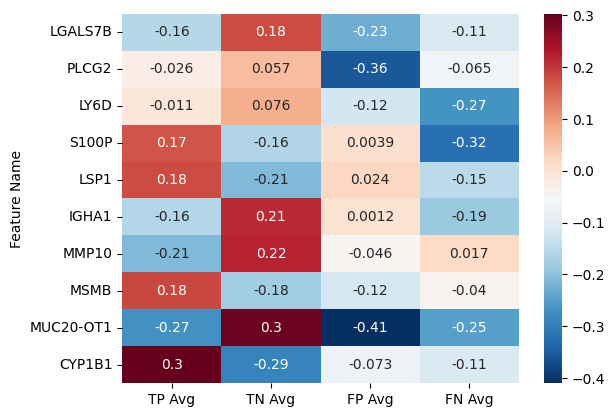

In [137]:
import matplotlib
cmap_reversed = matplotlib.cm.get_cmap('RdBu_r')
cmr = matplotlib.colormaps['RdBu_r']
sns.heatmap(results_df, annot=True,cmap= cmr)

In [100]:
results_df.head()
plotdf = results_df[['Correct Avg', 'Incorrect Avg']]
plotdf.index = results_df['Feature Name']
plotdf

,Correct Avg,Incorrect Avg
Feature Name,,
LGALS7B,0.003180,-0.160244
PLCG2,0.013488,-0.201291
LY6D,0.029437,-0.183353
S100P,0.015345,-0.207018
LSP1,-0.005547,-0.064961
IGHA1,0.018203,-0.104681
MMP10,-0.006770,-0.006718
MSMB,0.012780,-0.062188
MUC20-OT1,-0.001672,-0.328235


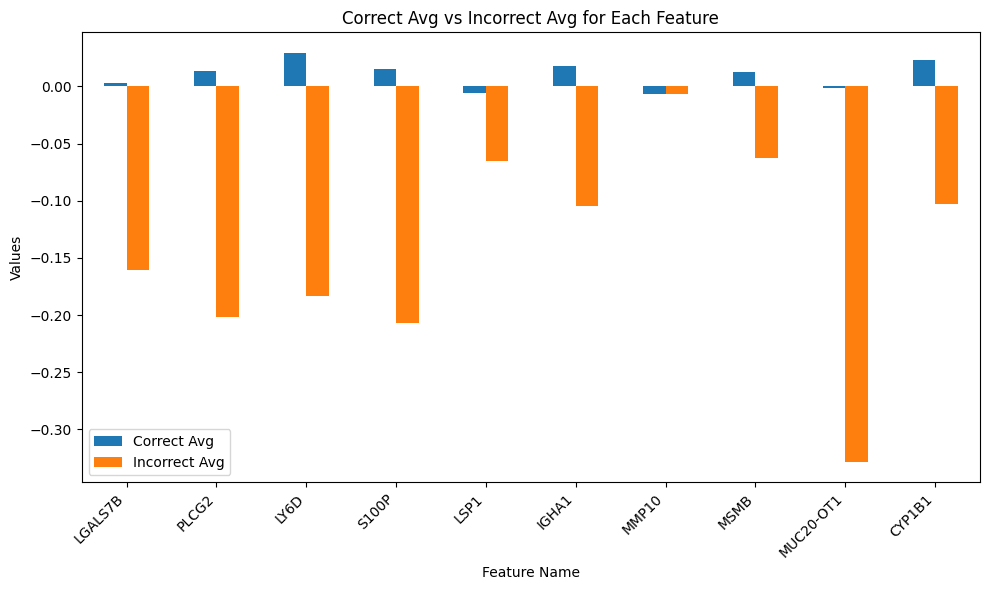

In [101]:

ax = plotdf.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Values')
ax.set_title('Correct Avg vs Incorrect Avg for Each Feature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

#test 

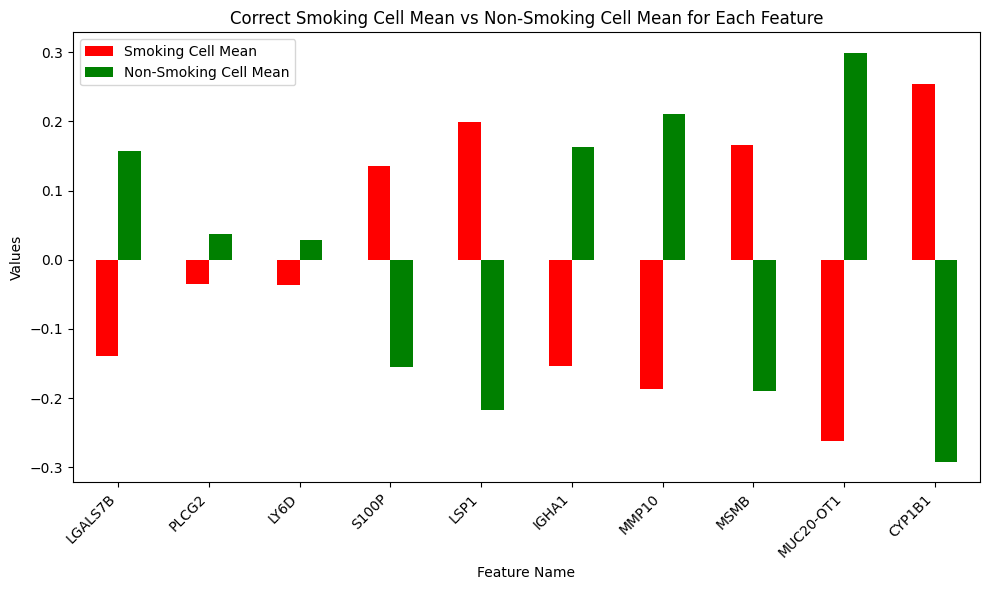

In [103]:
plotdf = results_df[['Smoking Cell Mean', 'Non-Smoking Cell Mean']]
plotdf.index = results_df['Feature Name']
plotdf

ax = plotdf.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])
ax.set_ylabel('Values')
ax.set_title('Correct Smoking Cell Mean vs Non-Smoking Cell Mean for Each Feature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

Accuracy: High at 95.37%, indicating effective overall classification.
Precision: High at 95.42%, suggesting few false positives.
Recall: High at 95.83%, meaning the model successfully identifies most positive cases.
AUC: Very high at 0.9900, reflecting excellent model discrimination between class
Found optimal threshold at 0.5702, balancing true positives and false positives.
Slight improvements in accuracy, precision, and recall after applying the optimal threshold
Identified key features like 'SLPI', 'TPPP3', 'LSP1', with both positive and negative influences on predictions.
The coefficients and average expression differences provide insights into feature significance..es.